In [3]:
%pip install holidays

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import holidays

mpl.style.use('ggplot')
figsize = (15,8)


In [5]:
df = pd.read_csv('total_load.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True) #Set the index as time
df.head()

,total-load
Time,
2014-01-01 01:00:00,36056.405196
2014-01-01 02:00:00,34284.410655
2014-01-01 03:00:00,32935.814471
2014-01-01 04:00:00,32061.817817
2014-01-01 05:00:00,32071.901631


In [6]:
df.index

DatetimeIndex(['2014-01-01 01:00:00', '2014-01-01 02:00:00',
               '2014-01-01 03:00:00', '2014-01-01 04:00:00',
               '2014-01-01 05:00:00', '2014-01-01 06:00:00',
               '2014-01-01 07:00:00', '2014-01-01 08:00:00',
               '2014-01-01 09:00:00', '2014-01-01 10:00:00',
               ...
               '2018-12-30 15:00:00', '2018-12-30 16:00:00',
               '2018-12-30 17:00:00', '2018-12-30 18:00:00',
               '2018-12-30 19:00:00', '2018-12-30 20:00:00',
               '2018-12-30 21:00:00', '2018-12-30 22:00:00',
               '2018-12-30 23:00:00', '2018-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=43704, freq=None)

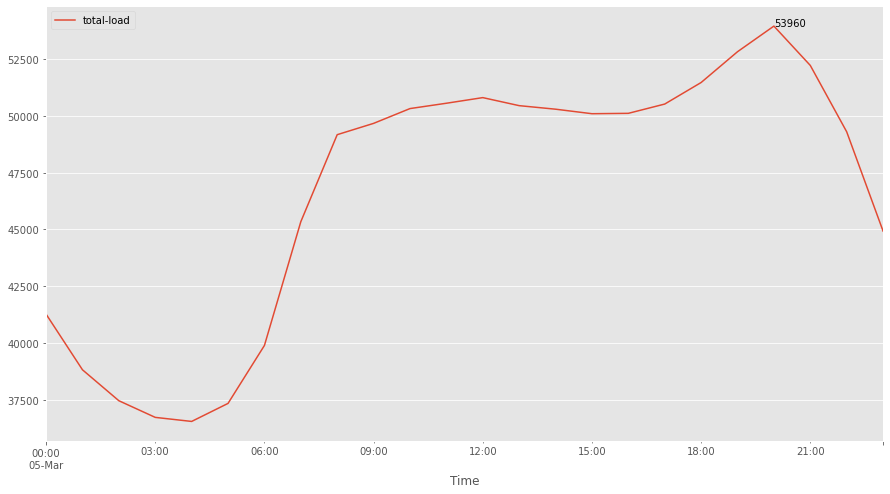

In [9]:
#What is the variation of power load during the day?
start_date = '2014-03-05'

#sns.lineplot(data=df.loc[start_date].reset_index(),x='Time',y='total-load')
day_df = df.loc[start_date]
xmax = day_df['total-load'].idxmax()
ymax = day_df['total-load'].max()
line_chart = day_df.plot(kind='line',figsize = figsize)
line_chart.annotate(round(ymax),xy=(xmax,ymax),xytext = (xmax,ymax+5))
line_chart.legend(loc='upper left')


<AxesSubplot:xlabel='Time'>

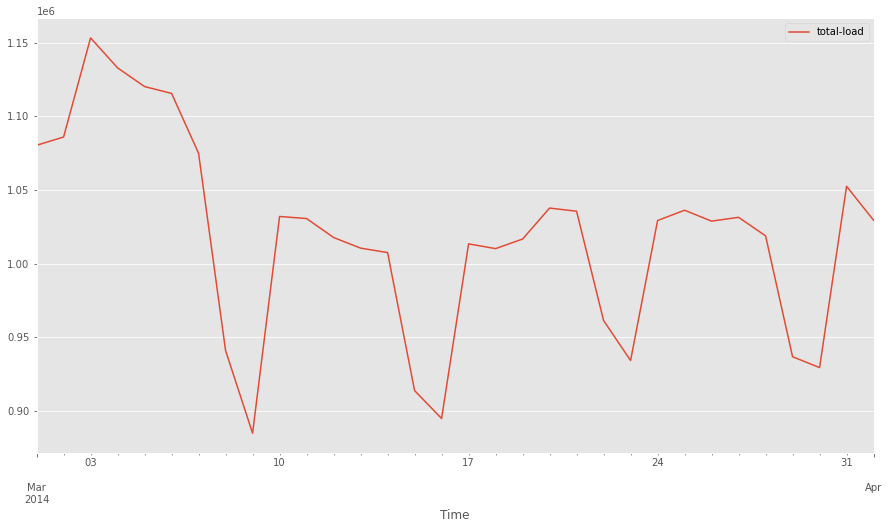

In [11]:
#What is the variation of power load during the month (unit : kA)
start_date = '2014-03-01'
end_date = '2014-04-01'

result = df.loc[start_date:end_date].resample('D').sum() #get daily data of a month
result.plot(kind='line',figsize = figsize)


(26196998.92482793, 34144567.852150366)

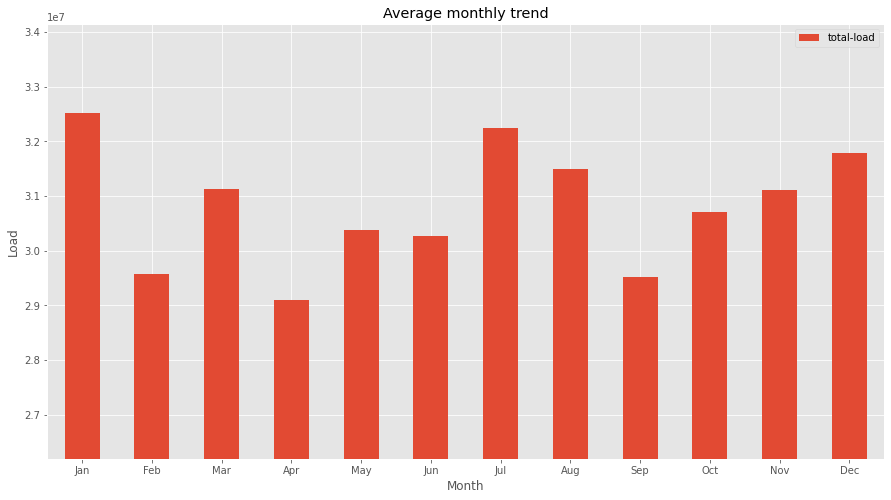

In [12]:
#What is the average monthly trend of power load?
Month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Monthly = df.resample('M').sum()
result = Monthly.groupby([Monthly.index.month]).mean() #Group the data by month
result.plot(kind='bar',figsize=figsize)
plt.xticks(range(len(Month_name)),Month_name,rotation=0)
plt.xlabel('Month')
plt.ylabel('Load')
plt.title('Average monthly trend')
plt.ylim(result.values.min()*.9,) #Adjust the y limit to visualize the difference

In [9]:
#Which month has the highest and lowest power load
print('Highest load :', Month_name[result['total-load'].idxmax()-1])
print('Lowest load :',Month_name[result['total-load'].idxmin()-1])

Highest load : Jan
Lowest load : Apr


(834159.0327350484, 1104706.007269735)

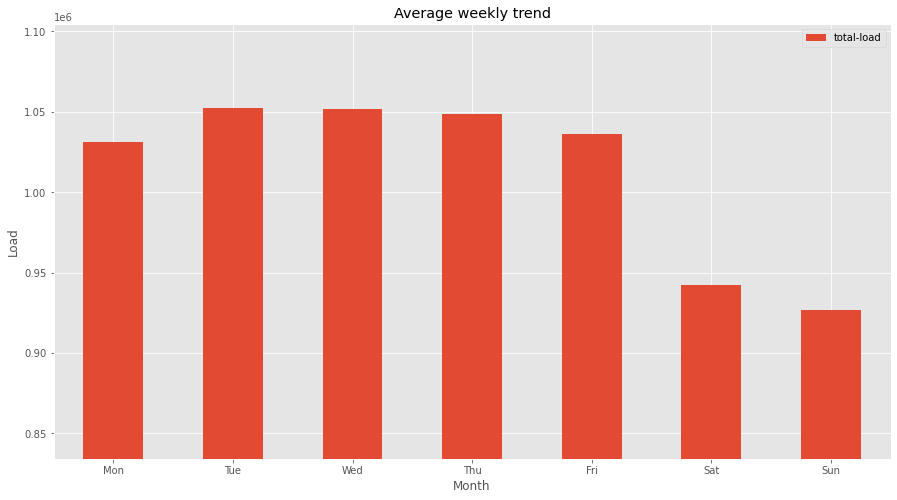

In [14]:
#What is the average weekly trend of power load
weekday_name = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Weekday = df.resample('D').sum().reset_index()
Weekday['Week_of_day'] = Weekday['Time'].dt.day_of_week
result = Weekday.groupby(['Week_of_day']).mean()
result.plot(kind='bar',figsize=figsize)
plt.xticks(range(len(weekday_name)),weekday_name,rotation=0)
plt.xlabel('Month')
plt.ylabel('Load')
plt.title('Average weekly trend')
plt.ylim(result.values.min()*.9,) #Adjust the y limit to visualize the difference


In [67]:
df_weather = pd.read_csv('weather.csv')
df_weather['LOCAL_DATE'] = pd.to_datetime(df_weather['LOCAL_DATE'])
df_weather.set_index('LOCAL_DATE', inplace=True) #Set the index as time
df_weather = df_weather.loc[:,['MEAN_TEMPERATURE_CALGARY','TOTAL_PRECIPITATION_CALGARY']]

Daily = df.resample('D').sum()
Daily

,total-load
Time,
2014-01-01,8.814642e+05
2014-01-02,1.029015e+06
2014-01-03,1.049607e+06
2014-01-04,1.020774e+06
2014-01-05,1.037748e+06
...,...
2018-12-27,1.011968e+06
2018-12-28,1.010097e+06
2018-12-29,9.330239e+05


In [68]:
df_weather

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY
LOCAL_DATE,,
1940-01-01,-11.4,0.5
1940-01-02,-12.0,0.5
1940-01-03,-12.0,1.0
1940-01-04,-11.4,0.8
1940-01-05,-13.1,0.5
...,...,...
2019-12-28,-7.7,0.0
2019-12-29,-3.3,0.0
2019-12-30,-1.6,0.0


In [69]:
joined = pd.merge(Daily,df_weather,left_index=True,right_index=True)

In [82]:
joined[joined.isnull().any(axis=1)]


,total-load,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY
2014-05-18,8.332661e+05,10.6,NaN
2014-06-16,9.905646e+05,11.4,NaN
2014-07-19,9.631261e+05,19.0,NaN
2014-08-04,9.126261e+05,16.4,NaN
2014-10-04,9.314418e+05,14.6,NaN
2014-10-08,1.017394e+06,9.4,NaN
2015-05-20,1.012590e+06,11.2,NaN
2015-05-30,8.867995e+05,11.5,NaN
2015-10-29,1.041475e+06,6.9,NaN
2015-12-13,1.009944e+06,-4.9,NaN


In [ ]:
#How statutory holidays will affect the load
ab_holidays = holidays.country_holidays('CA', subdiv='AB') #get the holidays in Alberta

Daily['Holidays'] = Daily['Time'].apply(lambda x:x in ab_holidays)

result = Daily.groupby(['Holidays']).mean()
result.plot(kind='bar',figsize=(12,10))
plt.xticks(range(2),['No','Yes'],rotation=0)
plt.ylabel('Load')
plt.title('Load Change in Statutory holidays of Alberta')
plt.ylim(result.values.min()*.9,) #Adjust the y limit to visualize the difference
non_holiday,holiday = result.values
print('The load will decrease by',int((non_holiday-holiday)/non_holiday*100),'%')

In [42]:
Daily.set_index('Time',inplace=True)



,total-load,Holidays
Time,,
2014-01-01,8.814642e+05,True
2014-01-02,1.029015e+06,False
2014-01-03,1.049607e+06,False
2014-01-04,1.020774e+06,False
2014-01-05,1.037748e+06,False
...,...,...
2018-12-27,1.011968e+06,False
2018-12-28,1.010097e+06,False
2018-12-29,9.330239e+05,False


In [32]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

Daily.loc[Daily['Holidays']==True]

,Time,total-load,Holidays
0,2014-01-01,8.814642e+05,True
47,2014-02-17,9.523320e+05,True
107,2014-04-18,9.141035e+05,True
110,2014-04-21,9.815421e+05,True
138,2014-05-19,8.598019e+05,True
181,2014-07-01,9.279488e+05,True
215,2014-08-04,9.126261e+05,True
243,2014-09-01,8.833007e+05,True
285,2014-10-13,8.855164e+05,True
314,2014-11-11,1.073436e+06,True
